# Figure 3 - `{Figure I am legend }`

A small description for the analysis, the metrics and how to interpret the figure.

## **NOTE**:

We assume that you have cloned the analysis repository and have `cd` into the parent directory. Before starting with the analysis make sure you have first completed the dependencies set up by following the instructions described in the **`dependencies/README.md`** document. All paths defined in this Notebook are relative to the parent directory (repository). Please close this Notebook and start again by following the above guidelines if you have not completed the aforementioned steps.

## Loading dependencies

In [5]:
library(coda)
library(rjags)
library(runjags)
source('dimorphAS/DBDA2Eprograms/DBDA2E-utilities.R')
load('dimorphAS/figures/figure3/figure3c.RData')


*********************************************************************
Kruschke, J. K. (2015). Doing Bayesian Data Analysis, Second Edition:
A Tutorial with R, JAGS, and Stan. Academic Press / Elsevier.
*********************************************************************



## Figure 3c

Some text for describing what is going to be executed and what it will produce

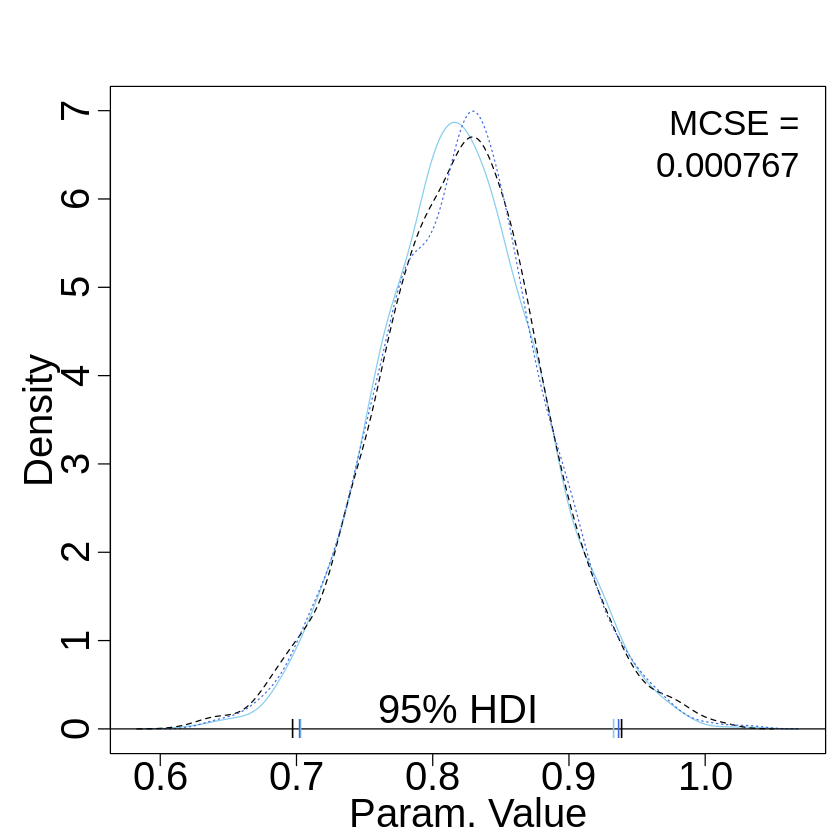

In [6]:
npgBlue<- rgb(60/256,84/256,136/256,1)
npgRed <- rgb(220/256,0,0,0.8)
npgGreen <- rgb(0,160/256,135/256,1)
npgBrown <- rgb(126/256,97/256,72/256,1)


myDbdaDensPlot = function( codaObject , parName=varnames(codaObject)[1] , plColors=NULL ) {
  if ( all( parName != varnames(codaObject) ) ) { 
    stop("parName must be a column name of coda object")
  }
  nChain = length(codaObject) # or nchain(codaObject)
  if ( is.null(plColors) ) plColors=1:nChain
  xMat = NULL
  yMat = NULL
  hdiLims = NULL
  for ( cIdx in 1:nChain ) {
    densInfo = density(codaObject[,c(parName)][[cIdx]]) 
    xMat = cbind(xMat,densInfo$x)
    yMat = cbind(yMat,densInfo$y)
    hdiLims = cbind(hdiLims,HDIofMCMC(codaObject[,c(parName)][[cIdx]]))
  }
  matplot( xMat , yMat , type="l" , col=plColors , 
           main="" , xlab="Param. Value" , ylab="Density" )
  abline(h=0)
  points( hdiLims[1,] , rep(0,nChain) , col=plColors , pch="|" )
  points( hdiLims[2,] , rep(0,nChain) , col=plColors , pch="|" )
  text( mean(hdiLims) , 0 , "95% HDI" , adj=c(0.5,-0.2), cex=2 )
  EffChnLngth = effectiveSize(codaObject[,c(parName)])
  MCSE = sd(as.matrix(codaObject[,c(parName)]))/sqrt(EffChnLngth) 
  text( max(xMat) , max(yMat) , adj=c(1.0,1.0) , cex=1.75 ,
        paste("MCSE =\n",signif(MCSE,3)) )
}

mydiag <- function( codaObject , parName=varnames(codaObject)[1] ,
                    saveName=NULL , saveType="pdf" ) {
  DBDAplColors =  c("skyblue","black","royalblue","steelblue")#c(npgBlue,"black",npgRed,npgGreen)
  par( mar=0.5+c(3,4,1,0) , oma=0.1+c(0,0,2,0) , mgp=c(2.25,0.7,0) , 
       cex.lab=2 , cex.axis=2)
  require(coda)
  # The following is the HDI plot
  myDbdaDensPlot(codaObject,parName,plColors=DBDAplColors)
  #Uncomment the following to add the title (beta3[101]), which is not informative so
  # we will leave it out.
  #mtext( text=parName , outer=TRUE , adj=c(0.5,0.5) , cex=2.0 )
}


mydiag( mcmcCoda , parName=c("beta3[101]") , saveName="fig3c")  

## Metadata

For replicability and reproducibility purposes, we also print the following metadata:

1. Checksums of **'artefacts'**, files generated during the analysis and stored in the folder directory **`data`**
2. List of environment metadata, dependencies, versions of libraries using `utils::sessionInfo()` and [`devtools::session_info()`](https://devtools.r-lib.org/reference/session_info.html)

### 1. Checksums with the sha256 algorithm

In [ ]:
figure_id   = "<the-figure-i-am-working-on>"

message("Generating sha256 checksums of the artefacts in the `..data/` directory .. ")
system(paste0("cd ../data/ && sha256sum * > ../metadata/", figure_id, "_sha256sums.txt"), intern = TRUE)
message("Done!\n")

data.table::fread(paste0("../metadata/", figure_id, "_sha256sums.txt"), header = FALSE, col.names = c("sha256sum", "file"))

### 2. Libraries metadata

In [ ]:
figure_id   = "<the-figure-i-am-working-on>"

dev_session_info   <- devtools::session_info()
utils_session_info <- utils::sessionInfo()

message("Saving `devtools::session_info()` objects in ../metadata/devtools_session_info.rds  ..")
saveRDS(dev_session_info, file = paste0("../metadata/", figure_id, "_devtools_session_info.rds"))
message("Done!\n")

message("Saving `utils::sessionInfo()` objects in ../metadata/utils_session_info.rds  ..")
saveRDS(utils_session_info, file = paste0("../metadata/", figure_id ,"_utils_info.rds"))
message("Done!\n")

session_info$platform
session_info$packages[session_info$packages$attached==TRUE, ]